<a href="https://colab.research.google.com/github/Carhuacusma/CC61_PDI_TA4_u201818067/blob/main/PDI_TA4_u201818067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Procesamiento Digital de Imágenes - Detección y segmentación

## Objetivos:

##Ejercicio: Detección y Segmentación

### Detección de descontinuidades

En imágenes, las descontinuidades buscadas son puntos, segmentos de rectas, bordes y uniones

"La representación de los bordes en una imagen reduce significativamente la cantidad de data a ser procesada, reteniendo información esencial sobre las formas de los objetos en escena"

## Código

###Importando librerías

In [28]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from skimage import io, filters, img_as_ubyte
from google.colab.patches import cv2_imshow

###Resaltar los bordes

#### Operador de Roberts

In [33]:
def roberts(baw, x=True, y=True): # baw: Imagen en escala de grises; x,y: booleans de en qué eje aplicar
  m_x = np.array([[ 1, 0],
                  [ 0,-1]])
  m_y = np.array([[-1, 0],
                  [ 0, -1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Sobel / Prewitt

In [44]:
def sobel_prewitt(baw, c=2, x=True, y=True):
  m_x = np.array([[-1, 0, 1],
                  [-c, 0, c],
                  [-1, 0, 1]])
  m_y = np.array([[ 1, c, 1],
                  [ 0, 0, 0],
                  [-1,-c,-1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Kirsch

In [62]:
def kirsch(baw,actua=[True for _ in range(8)]):
  mascaras = [np.array([[ 5, 5, 5],
                        [-3, 0,-3],
                        [-3,-3,-3]]),
              np.array([[-3, 5, 5],
                        [-3, 0, 5],
                        [-3,-3,-3]]),
              np.array([[-3,-3, 5],
                        [-3, 0, 5],
                        [-3,-3, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0, 5],
                        [-3, 5, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0,-3],
                        [ 5, 5, 5]]),
              np.array([[-3,-3,-3],
                        [ 5, 0,-3],
                        [ 5, 5,-3]]),
              np.array([[ 5,-3,-3],
                        [ 5, 0,-3],
                        [ 5,-3,-3]]),
              np.array([[ 5, 5,-3],
                        [ 5, 0,-3],
                        [-3,-3,-3]])]
  print(actua)    
  final = np.zeros(baw.shape,dtype=np.uint8)
  for i in range(8):
    if actua[i]:
      filtrada = cv2.filter2D(baw,-1,mascaras[i])
      final = final + filtrada
  return final

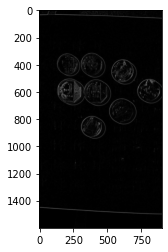

In [53]:
aux = filters.roberts(baw)
aux = img_as_ubyte(aux)
plt.imshow(aux,cmap='gray')

[True, True, False, False, False, False, False, False]


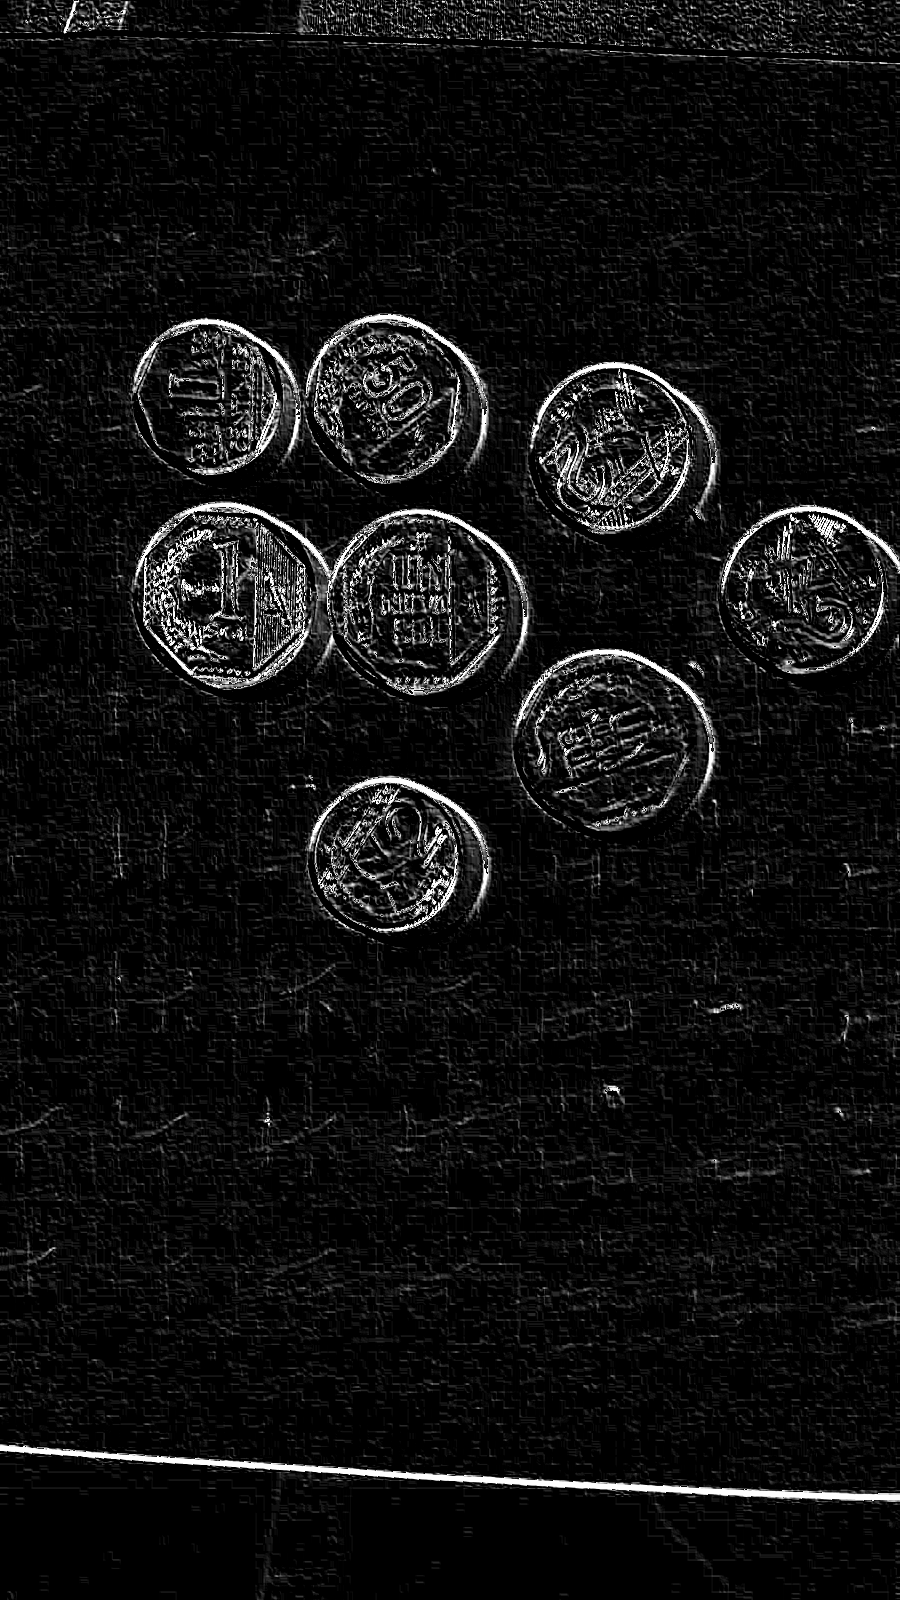

In [64]:
cv2_imshow(kirsch(baw,actua=[True,True,False,False,False,False,False,False]))

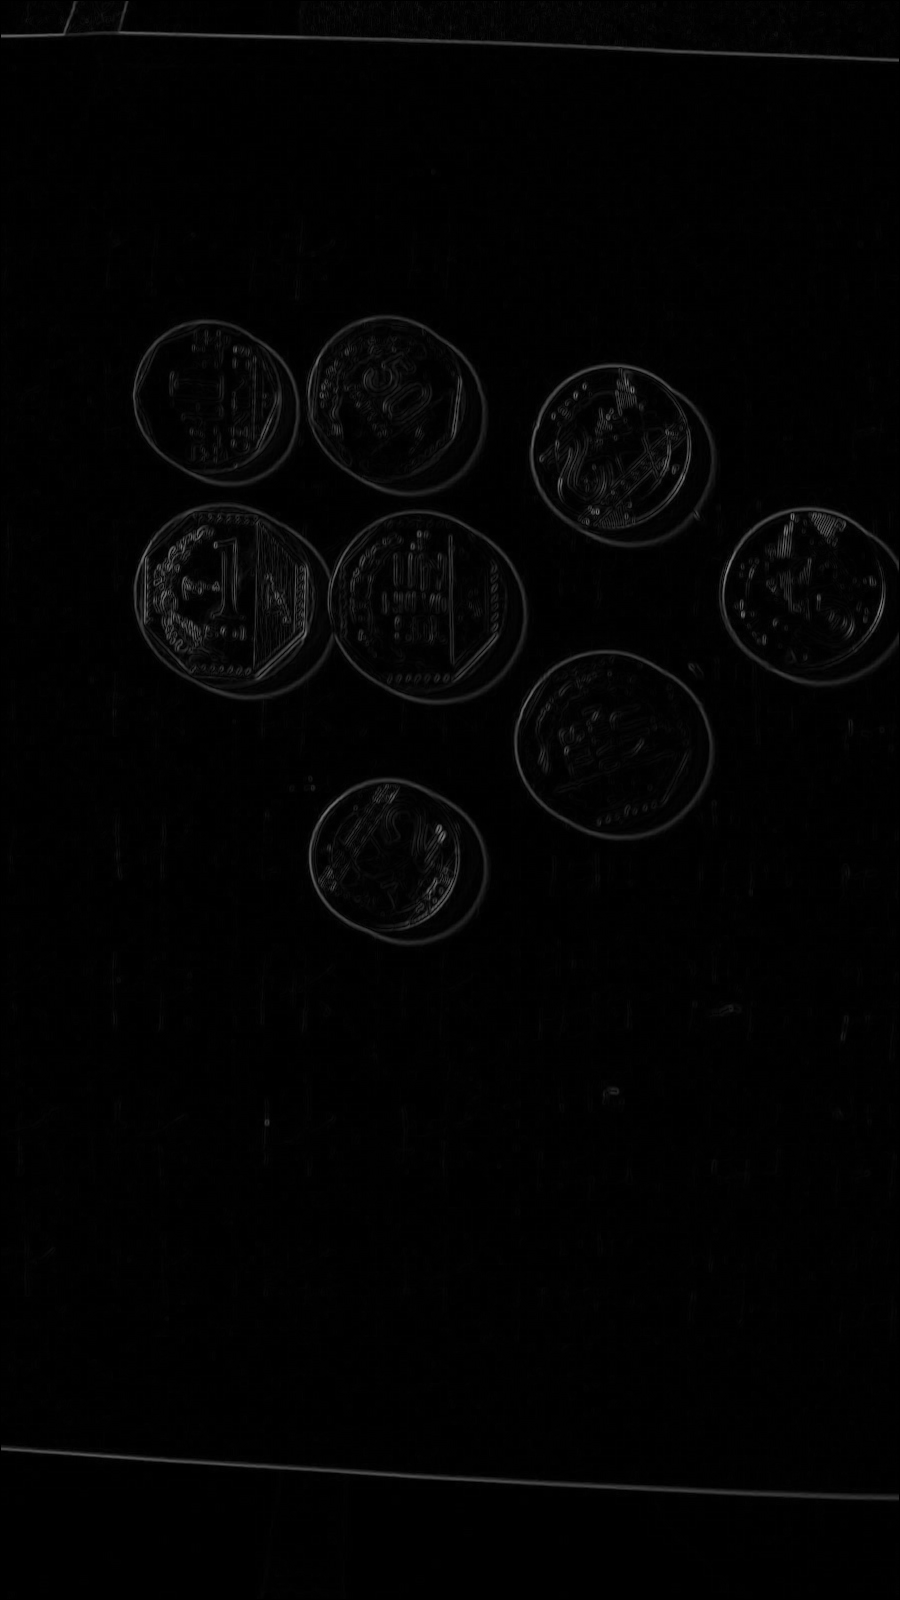

In [30]:
aux = cv2.cvtColor(aux,cv2.COLOR_GRAY2BGR)
cv2_imshow(aux)

###Cargando la imagen

In [3]:
imagen = io.imread("https://raw.githubusercontent.com/Carhuacusma/CC61_PDI_TA4_u201818067/main/monedas/fondoHoja.jpg")
print(type(imagen))

<class 'numpy.ndarray'>


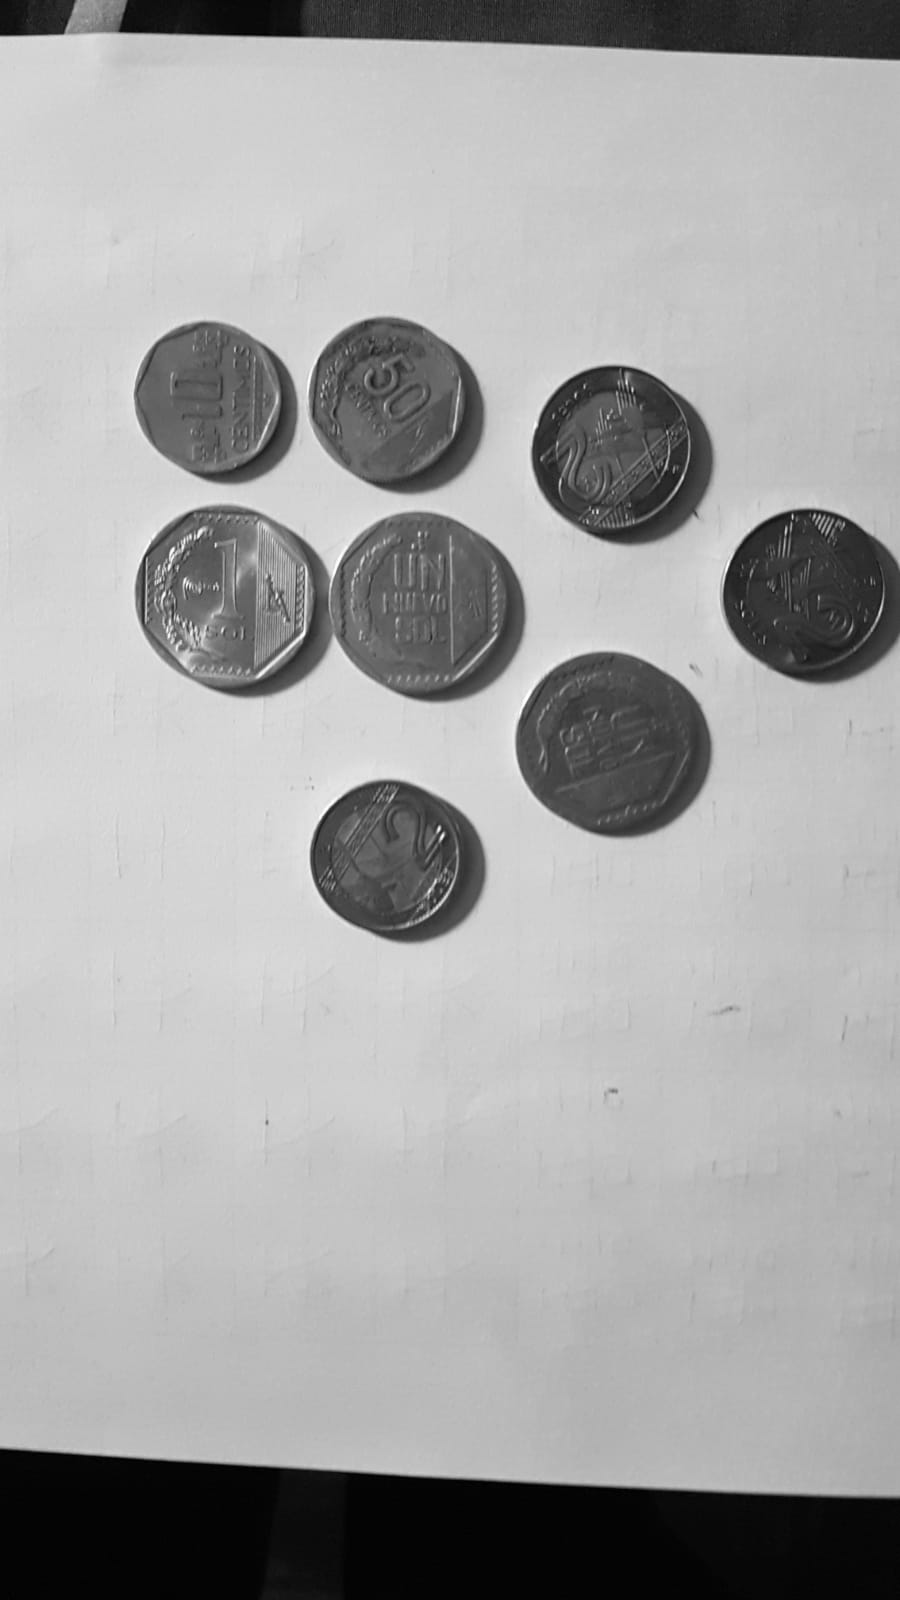

0

In [7]:
preprocesar(imagen)

In [6]:
def edgeDetection(imagen):
  # Si la imagen no está en escala de grises, convertirla a escala de grises
  if len(imagen.shape) > 2:
    imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Asume entrada con io.imread()
  # Aplicar Operador
  # TODO
  cv2_imshow(imagen)
  return 0

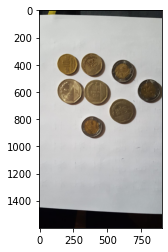

In [8]:
plt.imshow(imagen,cmap='gray')

In [12]:
baw = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)

## Conclusiones

## Bibliografía

* Rani, R. & Kumari, S. (2016) *An approach of detecting discontinuities in images*. Recuperado de: https://pdfs.semanticscholar.org/55e0/6c28291d943aaa481ecd669bce328d54fe74.pdf 
* Programmer Sought. Roberts, Sobel, Prewitt TODO.Recuperado de: https://www.programmersought.com/article/2672737346/ 